# PROJECT ON PREDICTING CAR PRICES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

raw = pd.read_csv('imports-85.data', names = cols)
raw

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Mapping out the variables
- Price is the dependent variable (y) and the categorical variables would be all the continuous ones, that can be clearly seen from the [relevant UCI link]('https://archive.ics.uci.edu/ml/datasets/automobile')
- A needed action is also related to data cleaning, namely we must kill all Nans and normalize all values into a 0-1 scale.

In [3]:
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 
                   'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = raw[continuous_cols]

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [5]:
cars = cars.replace('?', np.nan)
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
cars.isna().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

- Value imputation for all columns, included the target variable. We're doing it a bit rough, with averages for each column.

In [7]:
means = cars.astype(float).mean()
cars = cars.fillna(means)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [8]:
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


Time to normalize stuff with minmax scaling

In [9]:
#convert all dataframe to numeric values
cars = cars.astype(float)
#store the original price column
prices = cars['price']

#normalize dataframe with minmax scaling and reassign value to price col
def minmax_scaling(df):
    min_values = df.min()
    max_values = df.max()
    normalized_df = (df - min_values) / (max_values - min_values)
    return normalized_df

normalized_cars = minmax_scaling(cars)
normalized_cars = normalized_cars.dropna(axis = 0).reset_index(drop = True)
normalized_cars['price'] = prices
normalized_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


# Univariate model
A univariate model is a model where a single feature is used to predict a target variable.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict

In [11]:
def knn_test_train_v1(df, train_col, target_col, neighbors = 5):
    #Prepare features matrix and target vector
    X = df[[train_col]]
    y = df[target_col]
    
    #define data to perform a Two-fold cross validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    
    # Instantiate a KNN model using a k-neighbors value.
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    
    #Fit the model with the training matrix and target column y_train
    knn.fit(X_train, y_train)
    
    #predict the values on the remaining test matrix
    predicted_labels = knn.predict(X_test)
    
    # Calculate and return RMSE.
    mse = mean_squared_error(y_test, predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [12]:
knn_test_train_v1(train_col = 'horsepower', target_col = 'price', df = normalized_cars)

4225.857210752577

kf = KFold(n_splits = 2, shuffle = True, random_state = 0)
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index,  "\nTEST:", test_index)


In [13]:
def knn_test_train_v2(df, train_col, target_col, neighbors = 5, folds = 2):
    #Prepare features matrix and target vector
    X = df[[train_col]]
    y = df[target_col]
    
    #instantiate a number of folds for cross validation 
    kf = KFold(n_splits = folds, shuffle = True, random_state = 0)

    # Instantiate a KNN model using a k-neighbors value.
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    
    #Perform cross validation with the cross_val routine (that under the hood fits the model and predicts values)
    # cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation
    rmses = cross_val_score(knn, X, y, scoring = 'neg_root_mean_squared_error', cv = kf)
    maes = cross_val_score(knn, X, y, scoring = 'neg_mean_absolute_error', cv = kf)

    predicted_labels = cross_val_predict(knn, X, y, cv = kf)
    
    result = {}
    result['rmse'] = abs(rmses) #array of rmses equal to the number of folds
    result['mae'] = abs(maes)
    result['yhat'] = predicted_labels
    #return dictionary of accessible results
    return result

In [14]:
#testing the function to ouput results for a univariate model based on horsepower and 5 neighbors to predict prices
test_hp_5n = knn_test_train_v2(train_col = 'horsepower', target_col = 'price', df = normalized_cars, neighbors = 5 ,folds = 10)

#add a column to the main dataframe with the results
normalized_cars['yhat_hp'] = test_hp_5n['yhat']

for key in ['rmse','mae']:
    print(key, ':', test_hp_5n[key].mean())

rmse : 4027.0487625543888
mae : 2669.241137645108


To better compare results, we need to understand two things:
- Which feature (for now we have just used horsepower) can be the best to predict prices?
- Which is the optimal value of neighbors? Should we go for 5, less, or more?

Let us try to make a comparison across the board by testing the model on all single variables and by checking the most performing feature (the one that delivers the lowest rmses).

In [41]:
k_neighbors = [1,3,5,7,9]
labels = '1_neighbor 3_neighbor 5_neighbor 7_neighbor 9_neighbor'.split()
features = continuous_cols[:-1]

errors = [
    [round(knn_test_train_v2(train_col = f, target_col = 'price', df = normalized_cars, neighbors = k, folds = 5)['rmse'].mean(),2) 
     for f in features] #this lc generates the RMSES for each single feature (calculated as means of the k-folds)
    for k in k_neighbors #and repeats the operation for 5 different neighbors-size cases
]
data = pd.DataFrame(data = errors, columns = features, index = labels)#k_neighbors)
data.style.background_gradient(cmap='RdYlGn')


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1_neighbor,7957.210000,3984.530000,4968.950000,5328.840000,8226.420000,5206.420000,3861.610000,6891.150000,8976.850000,7611.270000,4614.060000,7480.770000,6158.900000,4786.520000
3_neighbor,7617.190000,4758.270000,4727.430000,4307.530000,7838.290000,4546.710000,3348.180000,6385.870000,7608.970000,6573.470000,4101.690000,7491.550000,4935.800000,4522.080000
5_neighbor,7583.340000,5576.150000,4898.860000,4240.200000,7647.500000,4138.390000,3561.620000,6705.290000,7345.710000,6450.180000,4046.090000,7471.000000,4560.270000,4162.220000
7_neighbor,7856.890000,5673.090000,5151.660000,4498.070000,7383.890000,4040.480000,3747.670000,6974.740000,7470.020000,6387.130000,4250.430000,7475.440000,4674.740000,4073.310000
9_neighbor,7800.480000,5792.070000,5255.210000,4508.700000,7384.410000,4076.860000,3758.910000,6956.480000,7320.660000,6363.040000,4383.150000,7616.870000,4572.010000,4239.570000


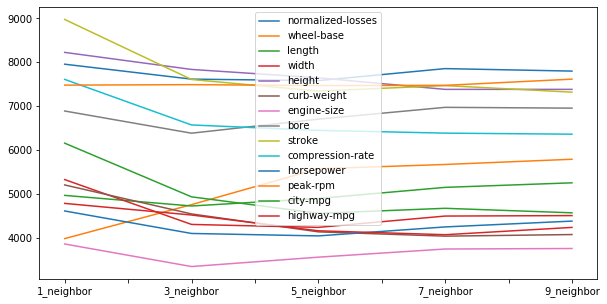

In [16]:
data.plot(figsize=(10,5))

Looks like a model with engine size as variable is the one reaching the lowest error point.

In [17]:
test_es_5n = knn_test_train_v2(train_col = 'engine-size', target_col = 'price', df = normalized_cars, neighbors = 5 ,folds = 10)
normalized_cars['yhat_es'] = test_es_5n['yhat']

Let us now plot the results

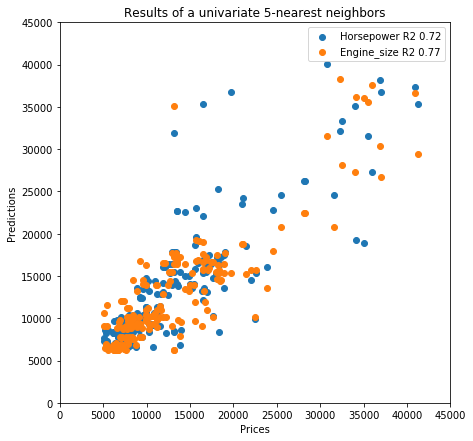

In [25]:
r2_hp = round(r2_score(normalized_cars['price'], normalized_cars['yhat_hp']),2)
r2_es = round(r2_score(normalized_cars['price'], normalized_cars['yhat_es']),2)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(y = normalized_cars['yhat_hp'], x = normalized_cars['price'])
ax.scatter(y = normalized_cars['yhat_es'], x = normalized_cars['price'])

ax.legend([f'Horsepower R2 {r2_hp}', f'Engine_size R2 {r2_es}'])
ax.set_xlabel('Prices')
ax.set_ylabel('Predictions')
ax.set_title('Results of a univariate 5-nearest neighbors')
ax.set_xlim(left = 0, right = 45000)
ax.set_ylim(bottom = 0, top = 45000)

plt.show()

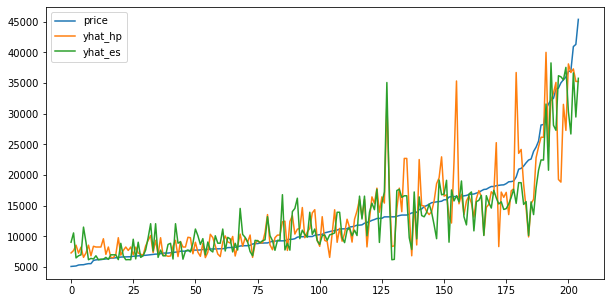

In [19]:
normalized_cars[['price','yhat_hp','yhat_es']].sort_values(by='price').reset_index(drop=True).plot(figsize = (10,5))

# Multivariate model
Best choices for a model are engine-size, city-mpg, highway-mpg, horsepower, curb-wight and potentially also width.

In [42]:
def knn_test_train_mv(df, train_cols, target_col, neighbors = 5, folds = 2):
    #Prepare features matrix and target vector
    X = df[train_cols]
    y = df[target_col]
    
    #instantiate a number of folds for cross validation 
    kf = KFold(n_splits = folds, shuffle = True, random_state = 0)

    # Instantiate a KNN model using a k-neighbors value.
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    
    #Perform cross validation with the cross_val routine (that under the hood fits the model and predicts values)
    # cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation
    rmses = cross_val_score(knn, X, y, scoring = 'neg_root_mean_squared_error', cv = kf)
    maes = cross_val_score(knn, X, y, scoring = 'neg_mean_absolute_error', cv = kf)

    predicted_labels = cross_val_predict(knn, X, y, cv = kf)
    
    result = {}
    result['rmse'] = abs(rmses) #array of rmses equal to the number of folds
    result['mae'] = abs(maes)
    result['yhat'] = predicted_labels
    #return dictionary of accessible results
    return result

In [59]:
features = ['engine-size', 'city-mpg', 'highway-mpg', 'curb-weight', 'horsepower', 'width']

In [62]:
mv_results = knn_test_train_mv(normalized_cars, features, target_col = 'price', neighbors = 5, folds = 5)
mv_results['rmse'].mean()

3377.8641063129485

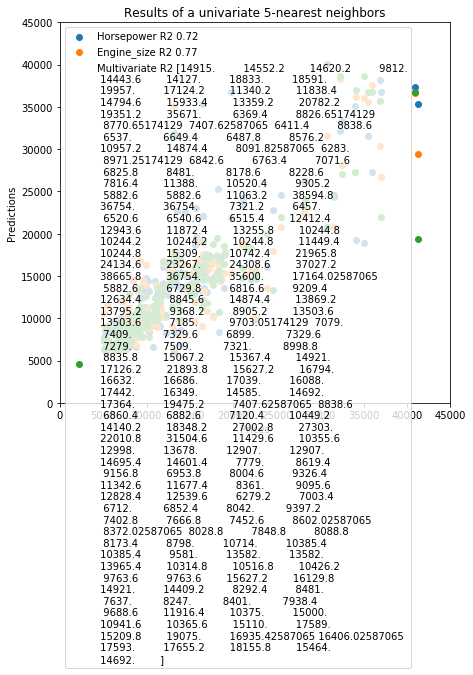

In [67]:
r2_hp = round(r2_score(normalized_cars['price'], normalized_cars['yhat_hp']),2)
r2_es = round(r2_score(normalized_cars['price'], normalized_cars['yhat_es']),2)
r2_mv = round(r2_score(normalized_cars['price'], mv),2)
mv = mv_results['yhat']

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(y = normalized_cars['yhat_hp'], x = normalized_cars['price'])
ax.scatter(y = normalized_cars['yhat_es'], x = normalized_cars['price'])
ax.scatter(y = mv, x = normalized_cars['price'])


ax.legend([f'Horsepower R2 {r2_hp}', f'Engine_size R2 {r2_es}', f'Multivariate R2 {r2_mv}'])
ax.set_xlabel('Prices')
ax.set_ylabel('Predictions')
ax.set_title('Results of a univariate 5-nearest neighbors')
ax.set_xlim(left = 0, right = 45000)
ax.set_ylim(bottom = 0, top = 45000)

plt.show()

array([14915.        , 14552.2       , 14620.2       ,  9812.        ,
       14443.6       , 14127.        , 18833.        , 18591.        ,
       19957.        , 17124.2       , 11340.2       , 11838.4       ,
       14794.6       , 15933.4       , 13359.2       , 20782.2       ,
       19351.2       , 35671.        ,  6369.4       ,  8826.65174129,
        8770.65174129,  7407.62587065,  6411.4       ,  8838.6       ,
        6537.        ,  6649.4       ,  6487.8       ,  8576.2       ,
       10957.2       , 14874.4       ,  8091.82587065,  6283.        ,
        8971.25174129,  6842.6       ,  6763.4       ,  7071.6       ,
        6825.8       ,  8481.        ,  8178.6       ,  8228.6       ,
        7816.4       , 11388.        , 10520.4       ,  9305.2       ,
        5882.6       ,  5882.6       , 11063.2       , 38594.8       ,
       36754.        , 36754.        ,  7321.2       ,  6457.        ,
        6520.6       ,  6540.6       ,  6515.4       , 12412.4       ,
      